In [1]:
from platform import python_version
print(python_version())

3.11.12


In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D
from keras.layers import Embedding
import keras;
print('TensorFlow:', tf.__version__, '| Keras:', keras.__version__)

TensorFlow: 2.18.0 | Keras: 3.8.0


In [ ]:
# Check GPU availability
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices())

# Force TensorFlow to use GPU
tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

Num GPUs Available: 1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import seaborn as sns

In [4]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Numpy version:", np.__version__)

TensorFlow version: 2.18.0
Keras version: 3.8.0
Numpy version: 2.0.2


In [ ]:
from charset_normalizer import from_path

file_path = "Dataset/SeparateDatasets/email_spam.csv"

# Detect encoding
result = from_path(file_path).best()
print("Detected encoding:", result.encoding)

# Load CSV with detected encoding
df1 = pd.read_csv(file_path, encoding=result.encoding)

# Keep only the required columns and rename them
df1 = df1[['text', 'type']].rename(columns={'text': 'email', 'type': 'label'})

# Replace 'not spam' with 'ham'
df1['label'] = df1['label'].replace({'not spam': 'ham'})

print(df1.head())


In [ ]:
import pandas as pd
from charset_normalizer import from_path

file_path = "Dataset/SeparateDatasets/emails.csv"

# Detect encoding
result = from_path(file_path).best()
print("Detected encoding:", result.encoding)

# Load CSV with detected encoding
df2 = pd.read_csv(file_path, encoding=result.encoding)

# Keep only the required columns and rename them
df2 = df2[['text', 'spam']].rename(columns={'text': 'email', 'spam': 'label'})

# Replace 'not spam' with 'ham'
df2['label'] = df2['label'].replace({0: 'ham', 1: 'spam'})

# Remove "Subject:" from the beginning of emails
df2['email'] = df2['email'].str.replace(r'^Subject:\s*', '', regex=True)

print(df2.head())

In [ ]:
from charset_normalizer import from_path

file_path = "Dataset/SeparateDatasets/emailsfa.csv"

# Detect encoding
result = from_path(file_path).best()
print("Detected encoding:", result.encoding)

# Load CSV with detected encoding
df3 = pd.read_csv(file_path, encoding=result.encoding)

# Keep only the required columns and rename them
df3 = df3[['text', 'label']].rename(columns={'text': 'email'})

print(df3.head())

In [ ]:
from charset_normalizer import from_path

file_path = "Dataset/SeparateDatasets/spam.csv"

# Detect encoding
result = from_path(file_path).best()
print("Detected encoding:", result.encoding)

# Load CSV with detected encoding
df4 = pd.read_csv(file_path, encoding=result.encoding)

# Keep only the required columns and rename them
df4 = df4[['v1', 'v2']].rename(columns={'v2': 'email', 'v1': 'label'})
df4 = df4[["email","label"]]

print(df4.head())

In [ ]:
from charset_normalizer import from_path

file_path = "Dataset/SeparateDatasets/spam_Emails_data.csv"

# Detect encoding
result = from_path(file_path).best()
print("Detected encoding:", result.encoding)

# Load CSV with detected encoding
df5 = pd.read_csv(file_path, encoding=result.encoding)

# Keep only the required columns and rename them
df5 = df5[['label', 'text']].rename(columns={'text': 'email'})
df5 = df5[['email','label']]
df5['label'] = df5['label'].replace({'Ham': 'ham', 'Spam': 'spam'})

print(df5.head())

In [ ]:
import pandas as pd

# Combine all dataframes vertically
train_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Shuffle the dataset
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the shuffled dataset to a CSV file
train_df.to_csv("Dataset/emails.csv", index=False)

print("Shuffled dataset saved successfully as emails.csv!")

Shuffled dataset saved successfully as emails.csv!


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
train_df = pd.read_csv("/content/drive/MyDrive/SpamDetector/Dataset/emails.csv")

In [8]:
train_df.iloc[0]

,0
email,on wed escapenumber may escapenumber christos ...
label,ham


In [9]:
train_df.shape

(206236, 2)

In [10]:
print(train_df.loc[3956, 'email'])

on escapenumber escapenumber escapenumber richard m heiberger wrote i am using rodbc to collect data from an odbc connection to an ms access database everything seems to be working well except datetimes between march escapenumber escapenumber escapenumber escapenumber and escapenumber escapenumber get moved one hour forward this does not seem to be happening with excel connecting to the same connection march escapenumber seems a bit early for daylight savings time what am i doing wrong in escapenumber the us moved daylight savings to march escapenumber instead of the more traditional first weekend in april it continues to november escapenumber a week later than before google daylight savings escapenumber for lots of background some ms programs did not make the switch until april escapenumber therefore my calendars doubled up continuing appointments from your experience it looks like some programs are retroactively misapplying the change to escapenumber this appears to be a strange inte

In [11]:
print(train_df.loc[3956, 'label'])

ham


In [12]:
train_df.label.value_counts()

,count
label,
ham,111903
spam,94333


In [13]:
train_df['new_label'] = train_df.label.apply(lambda x: 0 if x=='ham' else 1)
train_df.tail()

,email,label,new_label
206231,buenos d edas mi laptop es una hd pavilion dve...,ham,0
206232,( see attached file : hplo 809 . xls )\n- hplo...,ham,0
206233,subject journal langues call revue langues app...,ham,0
206234,does size matter escapenumber of women said th...,spam,1
206235,exactly how are you accessing it and what warn...,ham,0


In [14]:
num_classes = len(train_df.label.unique())
num_classes

2

In [15]:
train_df['email_no_punctuation'] = train_df['email'].str.replace('[^\w\s]','')
train_df['email_no_punctuation'] = train_df["email_no_punctuation"].fillna("fillna")

In [16]:
train_df.head()

,email,label,new_label,email_no_punctuation
0,on wed escapenumber may escapenumber christos ...,ham,0,on wed escapenumber may escapenumber christos ...
1,kim attached please find a consent to assignme...,ham,0,kim attached please find a consent to assignme...
2,please email me a copy of jodie floyd's mid ye...,ham,0,please email me a copy of jodie floyd's mid ye...
3,guess find tonight original message maggi mike...,ham,0,guess find tonight original message maggi mike...
4,sure tiny give call jerry original message roe...,ham,0,sure tiny give call jerry original message roe...


In [17]:
train_df.columns

Index(['email', 'label', 'new_label', 'email_no_punctuation'], dtype='object')

In [18]:
Y = train_df['new_label']

In [19]:
Y

,new_label
0,0
1,0
2,0
3,0
4,0
...,...
206231,0
206232,0
206233,0
206234,1


In [20]:
Y.shape

(206236,)

In [21]:
from collections import Counter

all_words = " ".join(train_df['email_no_punctuation']).split()
word_counts = Counter(all_words)
unique_words = len(word_counts)

print("Total unique words:", unique_words)

Total unique words: 600784


In [ ]:
import numpy as np

email_lengths = train_df['email_no_punctuation'].apply(lambda x: len(x.split()))

print("Mean length:", np.mean(email_lengths))
print("90th percentile:", np.percentile(email_lengths, 90))
print("95th percentile:", np.percentile(email_lengths, 95))
print("Max length:", np.max(email_lengths))

Mean length: 270.5327197967377
90th percentile: 567.0
95th percentile: 864.0
Max length: 1585483


In [22]:
max_features = 100000

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(max_features, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['email_no_punctuation'])

sequences = tokenizer.texts_to_sequences(train_df['email_no_punctuation'])
padded_sequences = pad_sequences(sequences, maxlen=400, padding='post', truncating='post')

In [24]:
len(tokenizer.word_index)

577867

In [25]:
vocab_size = len(tokenizer.word_index) + 1

In [26]:
Y = train_df['new_label']

In [27]:
Y.tail()

,new_label
206231,0
206232,0
206233,0
206234,1
206235,0


In [28]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(padded_sequences)
y = np.array(train_df['new_label'])

# First split: train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify keeps label distribution consistent
)

In [ ]:
X[0]

array([   16,  1624,     2,    45,     2, 30444, 33948,   422,    28,
          11,  1298, 92963,    18,    48,     6,     3,  9386,    17,
       13140,    23,   203,   543,     3,   142, 44109, 21687,   244,
           3, 59142,   663,     5,   244,  1996, 44109, 21687,     5,
         543,   253,     3,   483,   137,     6, 44109, 21687,    11,
          60,  1280,   832,     3,   235,     5,    29,   693,    31,
          11,   231,     3,   335,   367,    24, 14765,   109,   362,
           1,  1170,     5,   109,   362,     1,  1170,     3,   306,
         301,  5519,    11,    32,     4,    90,   290, 86422,   295,
          71,  2356,    12,    17,     3,    58,   350,    12,  1082,
          29,     2,     6,     3,  8707,     5,    32,  4335,     4,
           3,   324,     1,  3360,  2299,    12,    24, 10097,    35,
          95,    13,   486,    11,    31,   231,    24,    12,  1452,
           3, 15047,   235,    13,   220,    13,    28,  1018,  1133,
        1296,     8,

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
# Second split: train → train/val (10% of the 80% = 8% of total data)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPool1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
import os
os.environ["TF_GPU_ALLOCATOR"] = "cuda_malloc_async"
import tensorflow as tf

In [ ]:
import tensorflow as tf
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [31]:
def load_combined_fasttext_selected(embedding_paths, word_index, max_features, embedding_dim=300):
    embeddings_index = {}
    needed_words = set([word for word, i in word_index.items() if i < max_features])

    for path in embedding_paths:
        with open(path, encoding='utf-8') as f:
            next(f)  # skip header
            for line in f:
                values = line.rstrip().split(' ')
                word = values[0]
                if word in needed_words and word not in embeddings_index:
                    vector = np.asarray(values[1:], dtype='float32')
                    embeddings_index[word] = vector

    embedding_matrix = np.zeros((max_features, embedding_dim))
    for word, i in word_index.items():
        if i < max_features:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

    return embedding_matrix

In [32]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def call(self, inputs):
        score = K.tanh(inputs)
        attention_weights = K.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = K.sum(context_vector, axis=1)
        return context_vector

In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Embedding, Conv1D, MaxPooling1D, Dropout, Dense,
                                     BatchNormalization, Bidirectional, LSTM, GlobalMaxPooling1D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall
# Inputs
input_layer = Input(shape=(400,))

# Load pretrained FastText embedding matrix
embedding_matrix = load_combined_fasttext_selected(
    embedding_paths=['/content/drive/MyDrive/SpamDetector/FastText/EN/cc.en.300.vec', '/content/drive/MyDrive/SpamDetector/FastText/FA/cc.fa.300.vec'],
    word_index=tokenizer.word_index,
    max_features=max_features,
    embedding_dim=300
)

In [34]:
from tensorflow.keras.metrics import AUC
embedding_layer = Embedding(
    input_dim=max_features,
    output_dim=300,
    weights=[embedding_matrix],
    input_length=400,
    trainable=True  # or True to fine-tune
)(input_layer)

# Conv + LSTM + Attention
x = Conv1D(64, 3, activation='relu', padding='same', kernel_regularizer=l2(0.0005))(embedding_layer)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)


# Combine GlobalMaxPooling with Attention
from tensorflow.keras.layers import Concatenate
attention = Attention()(x)
pooling = GlobalMaxPooling1D()(x)
x = Concatenate()([attention, pooling])

x = Dense(128, activation='relu', kernel_regularizer=l2(0.0005))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5', monitor='val_loss', save_best_only=True, verbose=1)
]

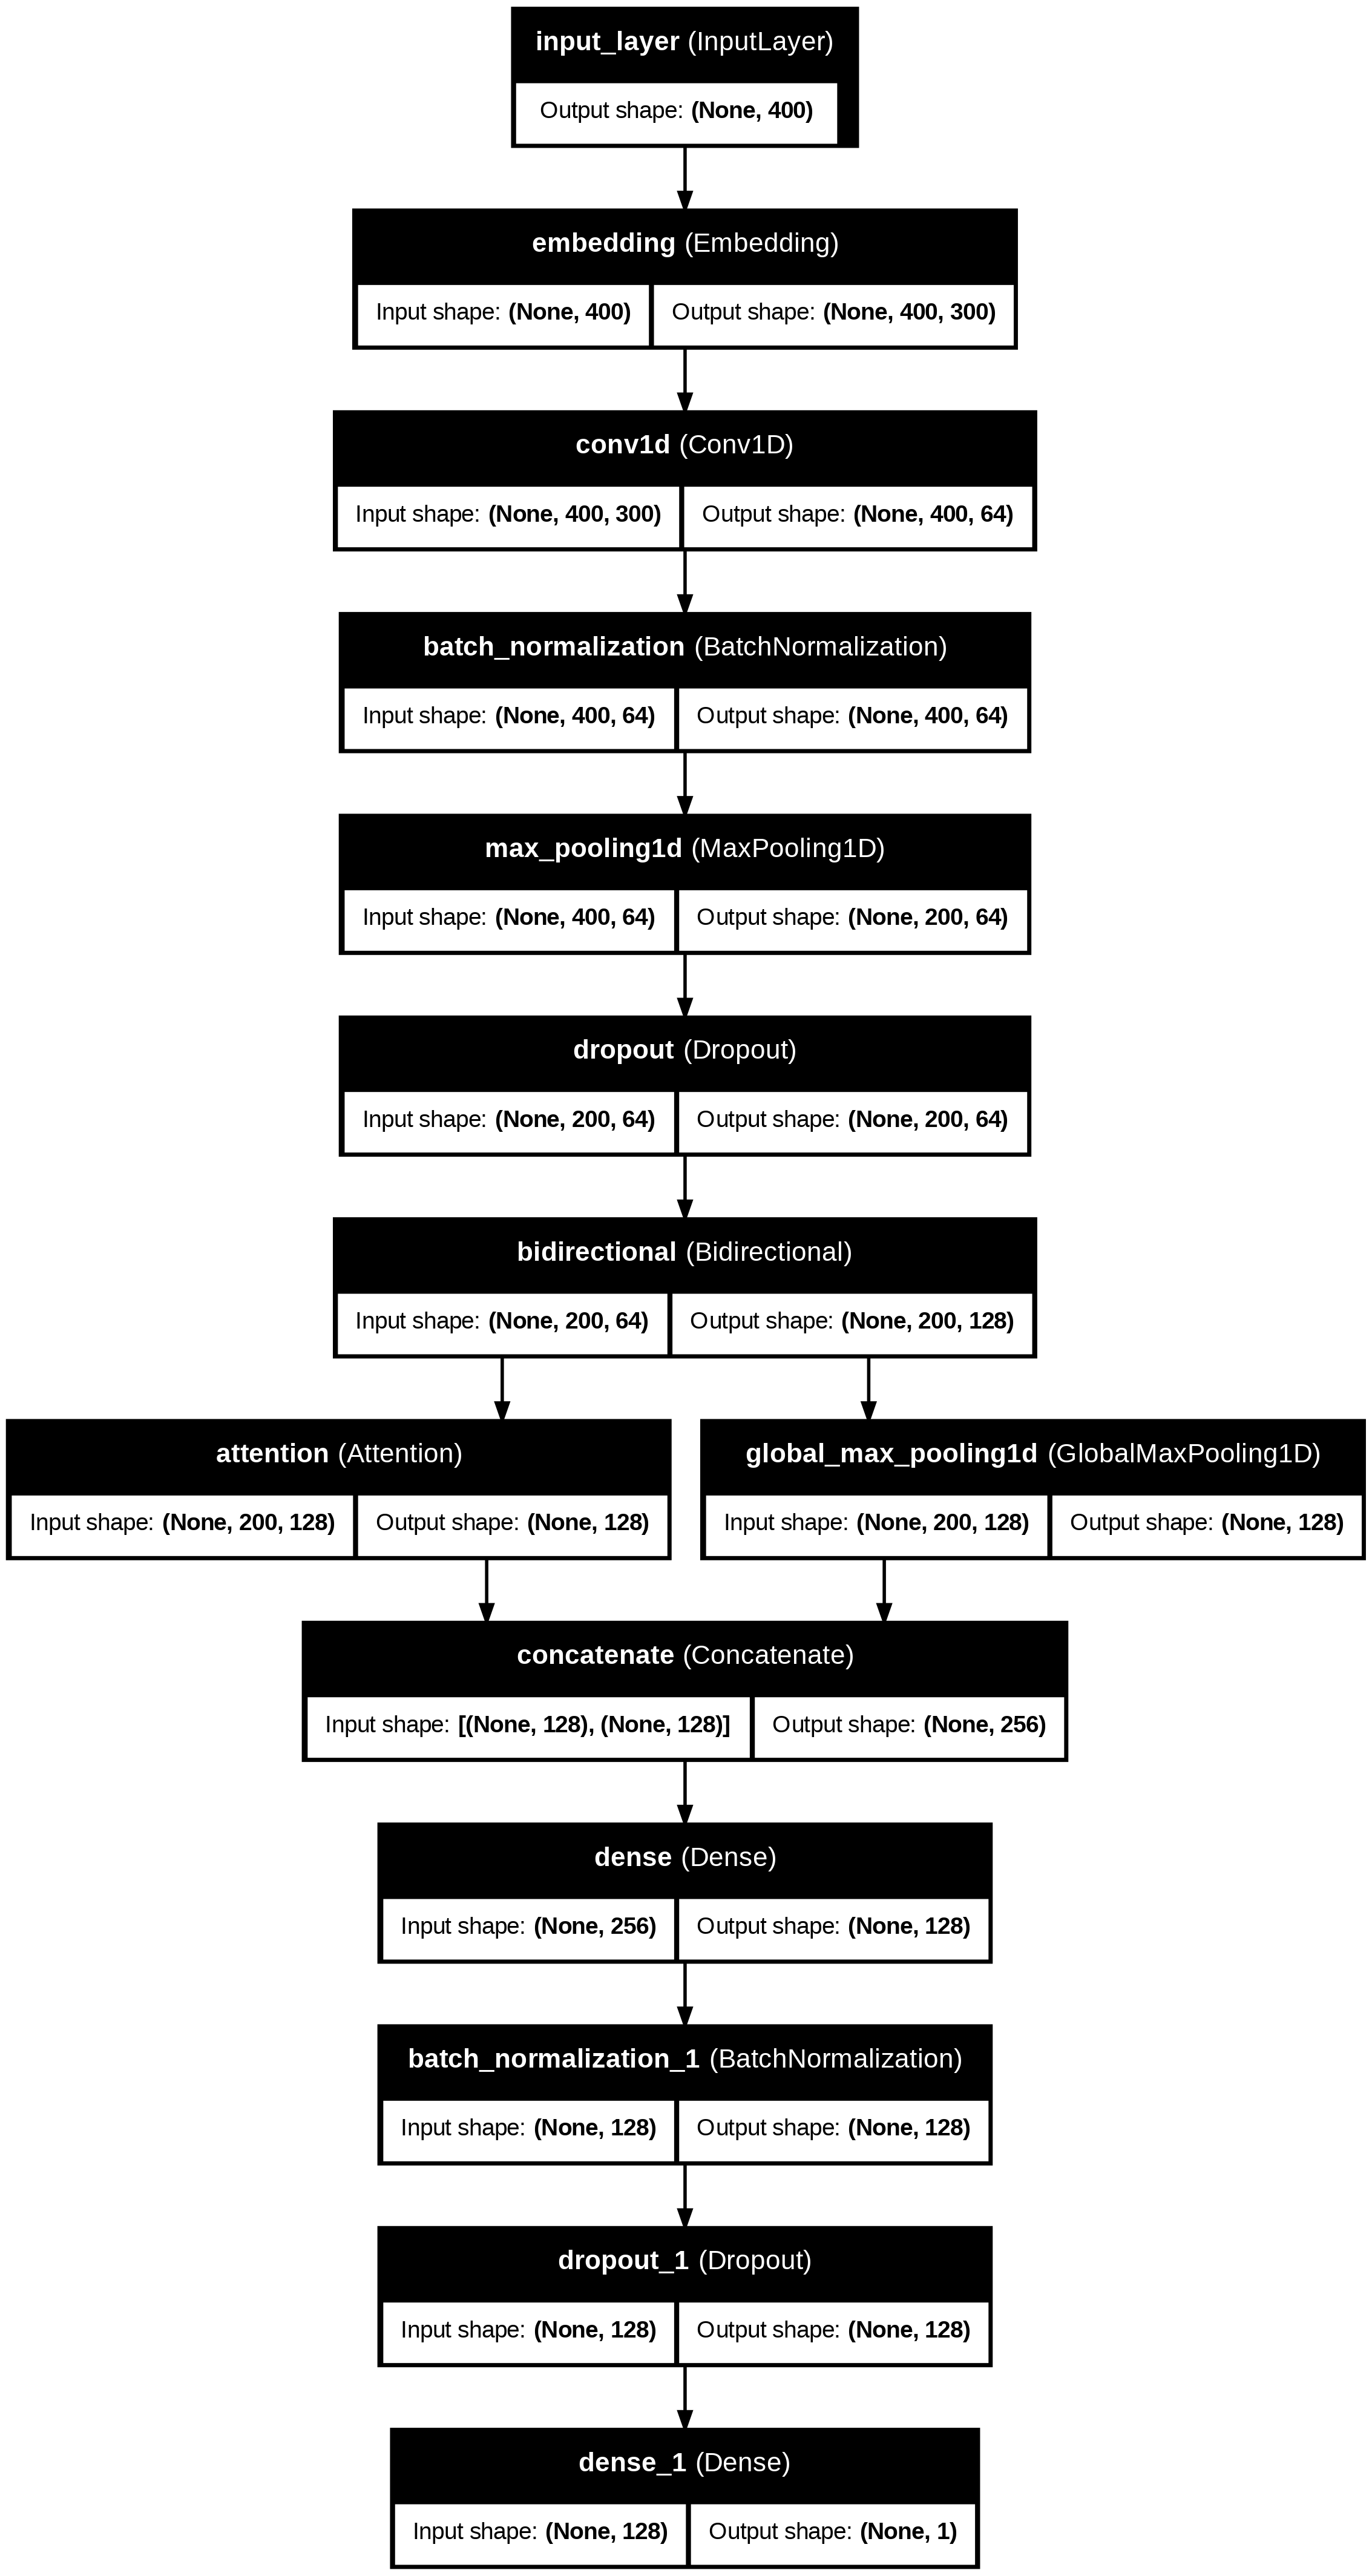

In [ ]:
from tensorflow.keras.utils import plot_model

# Save model architecture as an image
plot_model(model, to_file='/content/drive/MyDrive/SpamDetector/Model/model_architecture.png', show_shapes=True, show_layer_names=True)

In [37]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 400, 300)  │ 30,000,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 400, 64)   │     57,664 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 400, 64)   │        256 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 200, 64)   │          0 │ batch_normalizat… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 200, 64)   │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 200, 128)  │     66,048 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 128)       │          0 │ bidirectional[0]… │
│ (Attention)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ bidirectional[0]… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ attention[0][0],  │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 30,157,505 (115.04 MB)

 Trainable params: 30,157,121 (115.04 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
if tf.config.list_physical_devices('GPU'):
    print("Training on GPU...")

Training on GPU...


In [ ]:
# Train the model with GPU
with tf.device('/GPU:0'):
    history = model.fit(
        X_train_final, y_train_final,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=128,
        callbacks=callbacks
    )

Epoch 1/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7926 - auc: 0.8700 - loss: 0.5432 - precision: 0.7641 - recall: 0.7976
Epoch 1: val_loss improved from inf to 0.20708, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1881s 2s/step - accuracy: 0.7927 - auc: 0.8701 - loss: 0.5430 - precision: 0.7642 - recall: 0.7977 - val_accuracy: 0.9710 - val_auc: 0.9945 - val_loss: 0.2071 - val_precision: 0.9660 - val_recall: 0.9707 - learning_rate: 1.0000e-04
Epoch 2/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9695 - auc: 0.9951 - loss: 0.2030 - precision: 0.9664 - recall: 0.9671
Epoch 2: val_loss improved from 0.20708 to 0.16839, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1915s 2s/step - accuracy: 0.9695 - auc: 0.9951 - loss: 0.2030 - precision: 0.9664 - recall: 0.9671 - val_accuracy: 0.9808 - val_auc: 0.9967 - val_loss: 0.1684 - val_precision: 0.9719 - val_recall: 0.9866 - learning_rate: 1.0000e-04
Epoch 3/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9834 - auc: 0.9981 - loss: 0.1523 - precision: 0.9820 - recall: 0.9817
Epoch 3: val_loss improved from 0.16839 to 0.14726, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1960s 2s/step - accuracy: 0.9834 - auc: 0.9981 - loss: 0.1523 - precision: 0.9820 - recall: 0.9817 - val_accuracy: 0.9838 - val_auc: 0.9969 - val_loss: 0.1473 - val_precision: 0.9773 - val_recall: 0.9875 - learning_rate: 1.0000e-04
Epoch 4/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9905 - auc: 0.9991 - loss: 0.1185 - precision: 0.9895 - recall: 0.9897
Epoch 4: val_loss improved from 0.14726 to 0.12534, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1977s 2s/step - accuracy: 0.9905 - auc: 0.9991 - loss: 0.1185 - precision: 0.9895 - recall: 0.9897 - val_accuracy: 0.9871 - val_auc: 0.9974 - val_loss: 0.1253 - val_precision: 0.9793 - val_recall: 0.9927 - learning_rate: 1.0000e-04
Epoch 5/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9936 - auc: 0.9995 - loss: 0.0954 - precision: 0.9925 - recall: 0.9935
Epoch 5: val_loss improved from 0.12534 to 0.11064, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2007s 2s/step - accuracy: 0.9936 - auc: 0.9995 - loss: 0.0954 - precision: 0.9925 - recall: 0.9935 - val_accuracy: 0.9879 - val_auc: 0.9973 - val_loss: 0.1106 - val_precision: 0.9823 - val_recall: 0.9915 - learning_rate: 1.0000e-04
Epoch 6/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9953 - auc: 0.9996 - loss: 0.0795 - precision: 0.9949 - recall: 0.9948
Epoch 6: val_loss improved from 0.11064 to 0.09978, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2058s 2s/step - accuracy: 0.9953 - auc: 0.9996 - loss: 0.0795 - precision: 0.9949 - recall: 0.9948 - val_accuracy: 0.9876 - val_auc: 0.9971 - val_loss: 0.0998 - val_precision: 0.9908 - val_recall: 0.9820 - learning_rate: 1.0000e-04
Epoch 7/20
 129/1161 ━━━━━━━━━━━━━━━━━━━━ 29:05 2s/step - accuracy: 0.9945 - auc: 0.9999 - loss: 0.0720 - precision: 0.9917 - recall: 0.9961

In [38]:
import os
os.path.getsize('/content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5')

361966088

In [39]:
import os
print(os.path.abspath('/content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5'))

/content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


In [40]:
import h5py

try:
    with h5py.File('/content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5', 'r') as f:
        print("File is readable.")
        print("Keys:", list(f.keys()))
except Exception as e:
    print("Error reading file:", e)

File is readable.
Keys: ['model_weights', 'optimizer_weights']


In [ ]:
import tensorflow as tf
import h5py

print("TensorFlow:", tf.__version__)
print("h5py:", h5py.__version__)

TensorFlow: 2.18.0
h5py: 3.13.0


In [41]:
model.load_weights('/content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5')

In [ ]:
 # Train the model with GPU
with tf.device('/GPU:0'):
    history = model.fit(
        X_train_final, y_train_final,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=128,
        callbacks=callbacks,
        initial_epoch=6
    )

Epoch 7/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9963 - auc: 0.9997 - loss: 0.0655 - precision: 0.9959 - recall: 0.9961
Epoch 7: val_loss improved from inf to 0.09483, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1868s 2s/step - accuracy: 0.9963 - auc: 0.9997 - loss: 0.0655 - precision: 0.9959 - recall: 0.9961 - val_accuracy: 0.9871 - val_auc: 0.9970 - val_loss: 0.0948 - val_precision: 0.9816 - val_recall: 0.9903 - learning_rate: 1.0000e-04
Epoch 8/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9969 - auc: 0.9997 - loss: 0.0552 - precision: 0.9966 - recall: 0.9967
Epoch 8: val_loss improved from 0.09483 to 0.08862, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1916s 2s/step - accuracy: 0.9969 - auc: 0.9997 - loss: 0.0552 - precision: 0.9966 - recall: 0.9967 - val_accuracy: 0.9892 - val_auc: 0.9964 - val_loss: 0.0886 - val_precision: 0.9856 - val_recall: 0.9907 - learning_rate: 1.0000e-04
Epoch 9/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9976 - auc: 0.9998 - loss: 0.0466 - precision: 0.9972 - recall: 0.9976
Epoch 9: val_loss did not improve from 0.08862
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1879s 2s/step - accuracy: 0.9976 - auc: 0.9998 - loss: 0.0466 - precision: 0.9972 - recall: 0.9976 - val_accuracy: 0.9885 - val_auc: 0.9961 - val_loss: 0.0889 - val_precision: 0.9828 - val_recall: 0.9923 - learning_rate: 1.0000e-04
Epoch 10/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9981 - auc: 0.9999 - loss: 0.0396 - precision: 0.9979 - recall: 0.9981
Epoch 10: val_loss did not improve from 0.08862
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1884s 2s/step - accuracy: 0.9981 - auc: 0.9999 - loss: 0.0396 - precisi

1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1910s 2s/step - accuracy: 0.9983 - auc: 0.9999 - loss: 0.0341 - precision: 0.9982 - recall: 0.9982 - val_accuracy: 0.9882 - val_auc: 0.9961 - val_loss: 0.0803 - val_precision: 0.9837 - val_recall: 0.9907 - learning_rate: 1.0000e-04
Epoch 12/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9986 - auc: 0.9999 - loss: 0.0297 - precision: 0.9986 - recall: 0.9984
Epoch 12: val_loss did not improve from 0.08030
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1899s 2s/step - accuracy: 0.9986 - auc: 0.9999 - loss: 0.0297 - precision: 0.9986 - recall: 0.9984 - val_accuracy: 0.9881 - val_auc: 0.9955 - val_loss: 0.0813 - val_precision: 0.9833 - val_recall: 0.9907 - learning_rate: 1.0000e-04
Epoch 13/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9984 - auc: 0.9999 - loss: 0.0277 - precision: 0.9979 - recall: 0.9986
Epoch 13: val_loss improved from 0.08030 to 0.07690, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 2003s 2s/step - accuracy: 0.9984 - auc: 0.9999 - loss: 0.0277 - precision: 0.9979 - recall: 0.9986 - val_accuracy: 0.9886 - val_auc: 0.9959 - val_loss: 0.0769 - val_precision: 0.9850 - val_recall: 0.9902 - learning_rate: 1.0000e-04
Epoch 14/20
 557/1161 ━━━━━━━━━━━━━━━━━━━━ 16:42 2s/step - accuracy: 0.9989 - auc: 0.9999 - loss: 0.0241 - precision: 0.9986 - recall: 0.9990

In [ ]:
 # Train the model with GPU
with tf.device('/GPU:0'):
    history = model.fit(
        X_train_final, y_train_final,
        validation_data=(X_val, y_val),
        epochs=20,
        batch_size=128,
        callbacks=callbacks,
        initial_epoch=13
    )

Epoch 14/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9986 - auc: 0.9999 - loss: 0.0242 - precision: 0.9985 - recall: 0.9984
Epoch 14: val_loss improved from inf to 0.07660, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1841s 2s/step - accuracy: 0.9986 - auc: 0.9999 - loss: 0.0242 - precision: 0.9985 - recall: 0.9984 - val_accuracy: 0.9881 - val_auc: 0.9954 - val_loss: 0.0766 - val_precision: 0.9871 - val_recall: 0.9867 - learning_rate: 1.0000e-04
Epoch 15/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9987 - auc: 0.9999 - loss: 0.0220 - precision: 0.9984 - recall: 0.9987
Epoch 15: val_loss improved from 0.07660 to 0.07630, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1909s 2s/step - accuracy: 0.9987 - auc: 0.9999 - loss: 0.0220 - precision: 0.9984 - recall: 0.9987 - val_accuracy: 0.9893 - val_auc: 0.9952 - val_loss: 0.0763 - val_precision: 0.9876 - val_recall: 0.9890 - learning_rate: 1.0000e-04
Epoch 16/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9985 - auc: 0.9999 - loss: 0.0201 - precision: 0.9983 - recall: 0.9984
Epoch 16: val_loss did not improve from 0.07630
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1888s 2s/step - accuracy: 0.9985 - auc: 0.9999 - loss: 0.0201 - precision: 0.9983 - recall: 0.9984 - val_accuracy: 0.9890 - val_auc: 0.9951 - val_loss: 0.0777 - val_precision: 0.9858 - val_recall: 0.9903 - learning_rate: 1.0000e-04
Epoch 17/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9988 - auc: 0.9999 - loss: 0.0184 - precision: 0.9987 - recall: 0.9986
Epoch 17: val_loss improved from 0.07630 to 0.07510, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1954s 2s/step - accuracy: 0.9988 - auc: 0.9999 - loss: 0.0184 - precision: 0.9987 - recall: 0.9986 - val_accuracy: 0.9873 - val_auc: 0.9959 - val_loss: 0.0751 - val_precision: 0.9819 - val_recall: 0.9905 - learning_rate: 1.0000e-04
Epoch 18/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9990 - auc: 0.9999 - loss: 0.0164 - precision: 0.9989 - recall: 0.9990
Epoch 18: val_loss improved from 0.07510 to 0.07331, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1976s 2s/step - accuracy: 0.9990 - auc: 0.9999 - loss: 0.0164 - precision: 0.9989 - recall: 0.9990 - val_accuracy: 0.9885 - val_auc: 0.9954 - val_loss: 0.0733 - val_precision: 0.9869 - val_recall: 0.9881 - learning_rate: 1.0000e-04
Epoch 19/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9991 - auc: 0.9999 - loss: 0.0149 - precision: 0.9989 - recall: 0.9991
Epoch 19: val_loss improved from 0.07331 to 0.07133, saving model to /content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1950s 2s/step - accuracy: 0.9991 - auc: 0.9999 - loss: 0.0149 - precision: 0.9989 - recall: 0.9991 - val_accuracy: 0.9881 - val_auc: 0.9953 - val_loss: 0.0713 - val_precision: 0.9855 - val_recall: 0.9886 - learning_rate: 1.0000e-04
Epoch 20/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9991 - auc: 0.9999 - loss: 0.0137 - precision: 0.9989 - recall: 0.9991
Epoch 20: val_loss did not improve from 0.07133
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 1899s 2s/step - accuracy: 0.9991 - auc: 0.9999 - loss: 0.0137 - precision: 0.9989 - recall: 0.9991 - val_accuracy: 0.9885 - val_auc: 0.9950 - val_loss: 0.0749 - val_precision: 0.9832 - val_recall: 0.9918 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 19.


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

1289/1289 ━━━━━━━━━━━━━━━━━━━━ 328s 252ms/step


In [ ]:
y_pred_prob[0:10]

array([[5.0951335e-06],
       [9.9999988e-01],
       [1.0000000e+00],
       [4.0800554e-08],
       [9.9993813e-01],
       [1.0000000e+00],
       [9.9999607e-01],
       [6.1872591e-08],
       [4.4355113e-07],
       [2.7476906e-05]], dtype=float32)

In [ ]:
y_test[0:10]

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [ ]:
y_pred[0:10]

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

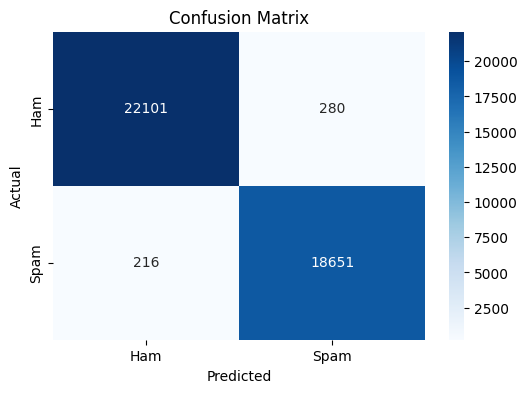

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99     22381
        Spam       0.99      0.99      0.99     18867

    accuracy                           0.99     41248
   macro avg       0.99      0.99      0.99     41248
weighted avg       0.99      0.99      0.99     41248

F1-score: 0.9869


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")

In [ ]:
model.load_weights('/content/drive/MyDrive/SpamDetector/Checkpoint/model_checkpoint.h5')

In [42]:
import re
import pandas as pd
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def prepare_spam_data(emails, labels, tokenizer, maxlen=400):

    """
    Prepares a spam detection dataset by cleaning text, encoding labels,
    tokenizing emails, and padding sequences.

    Parameters:
    emails (list or pd.Series): Raw email texts in English or Persian.
    labels (list or pd.Series): Corresponding labels as 'ham' or 'spam'.
    tokenizer (Tokenizer): A Keras Tokenizer object (will be fitted in-place).
    maxlen (int): Maximum length of padded sequences. Default is 400.

    Returns:
    df (pd.DataFrame): DataFrame containing original, cleaned emails and binary labels.
    padded_sequences (np.ndarray): Padded numerical sequences of tokenized emails.
    tokenizer (Tokenizer): The fitted Tokenizer object.
    vocab_size (int): Total vocabulary size after fitting the tokenizer.
    """

    df = pd.DataFrame({'email': emails, 'label': labels})

    # Clean text: remove punctuation
    df['email_no_punctuation'] = df['email'].str.replace(r'[^\w\s]', '', regex=True)
    df['email_no_punctuation'] = df['email_no_punctuation'].fillna("fillna")

    # Encode labels
    df['new_label'] = df['label'].apply(lambda x: 0 if x.strip().lower() == 'ham' else 1)

    # Tokenization
    tokenizer.fit_on_texts(df['email_no_punctuation'])

    sequences = tokenizer.texts_to_sequences(df['email_no_punctuation'])
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

    X = np.array(padded_sequences)
    y = np.array(df['new_label'])

    return X, y

In [87]:
sample_emails = [
    # ham
    "سلام، طبق اطلاعیه جدید، ساعات کاری شرکت از هفته آینده به ۸:۳۰ تا ۱۶:۳۰ تغییر پیدا می‌کند. لطفاً حضور و غیاب خود را در سامانه جدید ثبت نمایید.",

    "Dear Mr. Khosravi, thank you for submitting your financial report. Please find attached the review comments from our audit team. Kindly address them by Friday.",

    # spam
    "اکانت شما به دلیل فعالیت مشکوک در حال تعلیق است. برای جلوگیری از بسته شدن دائمی، فوراً وارد لینک زیر شوید و اطلاعات حساب خود را تأیید نمایید.",

    "💰 درآمد ثابت روزانه با عضویت در سیستم فروش خودکار! بدون نیاز به سرمایه، آموزش رایگان و پشتیبانی کامل. ثبت‌نام فقط با شماره تلفن.",

    "Congratulations! Your number has been shortlisted in our monthly prize draw. Click here to verify and claim your $500 reward before it expires."
]

sample_labels = ["ham", "ham", "spam", "spam", "spam"]


In [88]:
X, y = prepare_spam_data(sample_emails, sample_labels, tokenizer=tokenizer)

In [89]:
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


In [90]:
for text, true_label, pred_label, prob in zip(sample_emails, y, y_pred, y_pred_prob):
    print(f"Text: {text}")
    print(f"True: {'Spam' if true_label==1 else 'Ham'}")
    print(f"Predicted: {'Spam' if pred_label==1 else 'Ham'} (Prob: {prob[0]:.2f})\n")

Text: سلام، طبق اطلاعیه جدید، ساعات کاری شرکت از هفته آینده به ۸:۳۰ تا ۱۶:۳۰ تغییر پیدا می‌کند. لطفاً حضور و غیاب خود را در سامانه جدید ثبت نمایید.
True: Ham
Predicted: Spam (Prob: 1.00)

Text: Dear Mr. Khosravi, thank you for submitting your financial report. Please find attached the review comments from our audit team. Kindly address them by Friday.
True: Ham
Predicted: Ham (Prob: 0.00)

Text: اکانت شما به دلیل فعالیت مشکوک در حال تعلیق است. برای جلوگیری از بسته شدن دائمی، فوراً وارد لینک زیر شوید و اطلاعات حساب خود را تأیید نمایید.
True: Spam
Predicted: Spam (Prob: 0.90)

Text: 💰 درآمد ثابت روزانه با عضویت در سیستم فروش خودکار! بدون نیاز به سرمایه، آموزش رایگان و پشتیبانی کامل. ثبت‌نام فقط با شماره تلفن.
True: Spam
Predicted: Spam (Prob: 0.99)

Text: Congratulations! Your number has been shortlisted in our monthly prize draw. Click here to verify and claim your $500 reward before it expires.
True: Spam
Predicted: Spam (Prob: 1.00)



In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

correct = sum(y.flatten() == y_pred.flatten())
total = len(y)

print(f"Correct Predictions: {correct} / {total}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Correct Predictions: 4 / 5
Accuracy: 0.80
Precision: 0.75
Recall: 1.00
F1-score: 0.86
